# EXPLORATION_02

## 프로젝트(1) load_digits : 손글씨를 분류해 봅시다

### 1. 필요한 모듈 import 하기

In [26]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
%matplotlib inline

###  2. 데이터 준비

In [27]:
digits = load_digits()

### 3. 데이터 이해하기

In [28]:
# 어떤 정보들이 담겼는지 확인
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [29]:
# Feature Data 지정하기
digits_data = digits.data
print(digits_data.shape)
digits_data[0]

(1797, 64)


array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [30]:
# Lable Data 지정하기
digits_label = digits.target
print(digits_label.shape)
digits_label[:20]

(1797,)


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [31]:
# Target Names 출력해보기
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


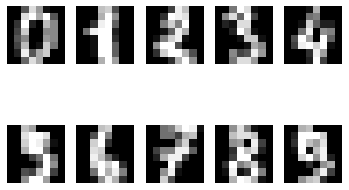

In [32]:
# 이미지 확인하기
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(digits.data[i].reshape(8, 8), cmap='gray')
    plt.axis('off')
plt.show()

### 4. train, test 데이터 분리

In [33]:
# 데이터셋을 pandas가 제공하는 DataFrame 이라는 자료형으로 변환
digits_df = pd.DataFrame(data=digits_data, columns=digits.feature_names)
digits_df.head()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_6,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [34]:
# 정답데이터 컬럼 추가
digits_df["label"] = digits.target
digits_df

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,label
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [35]:
# train, test set 나누기
X_train, X_test, y_train, y_test = train_test_split(digits_data, 
                                                    digits_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  1437 , X_test 개수:  360


In [36]:
# train set 확인
X_train.shape, y_train.shape

((1437, 64), (1437,))

In [37]:
# test set 확인
X_test.shape, y_test.shape

((360, 64), (360,))

In [38]:
# y 확인
y_train, y_test

(array([2, 2, 2, ..., 1, 3, 3]),
 array([6, 0, 5, 9, 2, 9, 0, 4, 1, 0, 1, 8, 2, 5, 2, 8, 1, 8, 9, 1, 0, 2,
        0, 4, 5, 3, 3, 0, 0, 4, 1, 4, 4, 4, 6, 1, 4, 0, 6, 6, 0, 9, 3, 6,
        6, 2, 0, 1, 9, 6, 2, 8, 9, 9, 0, 2, 0, 8, 4, 6, 8, 5, 8, 7, 8, 7,
        7, 4, 1, 4, 5, 5, 4, 6, 2, 0, 1, 3, 7, 5, 8, 2, 4, 4, 2, 5, 1, 9,
        3, 7, 6, 3, 3, 5, 6, 2, 1, 0, 1, 9, 4, 1, 1, 3, 1, 6, 9, 0, 3, 7,
        6, 9, 3, 8, 0, 8, 3, 8, 8, 6, 3, 7, 3, 9, 0, 3, 0, 9, 8, 1, 2, 2,
        3, 6, 9, 4, 0, 5, 4, 2, 9, 1, 0, 2, 5, 0, 2, 2, 7, 4, 6, 9, 8, 2,
        6, 0, 4, 4, 8, 5, 0, 2, 4, 6, 8, 2, 3, 7, 2, 9, 0, 3, 5, 9, 1, 6,
        8, 7, 5, 3, 0, 4, 2, 1, 3, 3, 6, 0, 2, 8, 4, 1, 4, 7, 5, 7, 6, 6,
        8, 1, 0, 6, 8, 7, 1, 1, 9, 8, 5, 5, 3, 6, 8, 1, 2, 0, 7, 5, 3, 0,
        8, 2, 0, 4, 0, 9, 4, 8, 4, 7, 9, 7, 3, 6, 2, 5, 1, 5, 9, 2, 9, 9,
        8, 2, 1, 6, 7, 1, 7, 5, 7, 8, 9, 5, 7, 4, 3, 7, 8, 8, 2, 8, 9, 5,
        3, 2, 8, 0, 4, 2, 1, 0, 8, 4, 1, 7, 1, 4, 7, 7, 1, 8, 3, 8, 4, 3,
     

### 5. 다양한 모델로 학습시켜보기

#### 5-1. Decision Tree 사용해 보기

In [39]:
decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

decision_tree.fit(X_train, y_train)

classifier


DecisionTreeClassifier(random_state=32)

#### 5-2. Random Forest 사용해 보기

In [40]:
random_forest = RandomForestClassifier(random_state=32)
print(random_forest._estimator_type)

random_forest.fit(X_train, y_train)

classifier


RandomForestClassifier(random_state=32)

#### 5-3. SVM 사용해 보기

In [41]:
svm_model = svm.SVC()
print(svm_model._estimator_type)

svm_model.fit(X_train, y_train)

classifier


SVC()

#### 5-4. SGD Classifier 사용해 보기

In [42]:
sgd_model = SGDClassifier()
print(sgd_model._estimator_type)

sgd_model.fit(X_train, y_train)

classifier


SGDClassifier()

#### 5-5. Logistic Regression 사용해 보기

In [43]:
logistic_model = LogisticRegression()
print(logistic_model._estimator_type)

logistic_model.fit(X_train, y_train)

classifier


C:\Users\lg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 6. 모델을 평가해보기

#### 6-1. Decision Tree

In [44]:
y_pred1 = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.81      0.81      0.81        42
           2       0.79      0.82      0.80        40
           3       0.79      0.91      0.85        34
           4       0.83      0.95      0.89        37
           5       0.90      0.96      0.93        28
           6       0.84      0.93      0.88        28
           7       0.96      0.82      0.89        33
           8       0.88      0.65      0.75        43
           9       0.78      0.78      0.78        32

    accuracy                           0.86       360
   macro avg       0.86      0.86      0.86       360
weighted avg       0.86      0.86      0.85       360



####  6-2. Random Forest 

In [45]:
y_pred2 = random_forest.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99        43
           1       0.93      1.00      0.97        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       0.93      1.00      0.96        37
           5       0.90      0.96      0.93        28
           6       1.00      0.96      0.98        28
           7       0.94      0.97      0.96        33
           8       1.00      0.84      0.91        43
           9       0.94      0.94      0.94        32

    accuracy                           0.96       360
   macro avg       0.96      0.96      0.96       360
weighted avg       0.97      0.96      0.96       360



#### 6-3. SVM

In [46]:
y_pred3 = svm_model.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      1.00      0.98        42
           2       1.00      1.00      1.00        40
           3       1.00      1.00      1.00        34
           4       1.00      1.00      1.00        37
           5       0.93      1.00      0.97        28
           6       1.00      1.00      1.00        28
           7       1.00      1.00      1.00        33
           8       1.00      0.93      0.96        43
           9       1.00      0.97      0.98        32

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360



#### 6-4. SGD Classifier

In [47]:
y_pred4 = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.87      0.98      0.92        42
           2       0.98      1.00      0.99        40
           3       0.97      0.94      0.96        34
           4       0.95      0.97      0.96        37
           5       0.96      0.96      0.96        28
           6       0.96      0.93      0.95        28
           7       0.94      0.97      0.96        33
           8       0.93      0.88      0.90        43
           9       0.93      0.81      0.87        32

    accuracy                           0.95       360
   macro avg       0.95      0.94      0.95       360
weighted avg       0.95      0.95      0.95       360



#### 6-5. Logistic Regression 

In [48]:
y_pred5 = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        43
           1       0.95      0.95      0.95        42
           2       0.98      1.00      0.99        40
           3       0.94      0.97      0.96        34
           4       0.97      1.00      0.99        37
           5       0.82      0.96      0.89        28
           6       1.00      0.96      0.98        28
           7       0.97      0.97      0.97        33
           8       0.92      0.81      0.86        43
           9       0.97      0.91      0.94        32

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



In [49]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 데이터 크기: ', y_test.shape)
print('테스트 데이터 세트 레이블의 분포도: ')
print(pd.Series(y_test).value_counts())

레이블 테스트 데이터 크기:  (360,)
테스트 데이터 세트 레이블의 분포도: 
8    43
0    43
1    42
2    40
4    37
3    34
7    33
9    32
6    28
5    28
dtype: int64


#### 평가척도 => accuracy를 선택!
* 이유 : 위의 코드에서 test set의 레이블의 분포를 확인해보니 데이터가 불균형하지 않고 거의 비슷비슷한 분포를 가지고 있는걸 확인할 수 있다. 정확도는 불균형한 데이터에서 문제가 발생하는, 즉, 정답의 분포에 따라 모델의 성능을 잘 평가하지 못하는 척도지만, 여기서는 불균형한 데이터가 아니므로 정확도를 평가척도로 사용가능하다. f1-score와 비교했을 때도 대부분 정확도와 같은 값을 보이는 것을 보면 문제가 없을 것으로 판단하였다.
* recall과 precision을 사용하지 않은 이유는 이 모델로 특정 클래스를 더 잘 분류하는 것이 아닌 10개의 클래스를 전체적으로 잘 분류하는 것이 목적이기 때문이다.
 


#### accuracy 비교
* Decision Tree : 0.86

* Random Forest : 0.96

* SVM : 0.99

* SGD Classifier : 0.95

* Logistic Regression : 0.95

##### => SVM의 성능이 정확도 0.99로 가장 좋다

****

## 프로젝트(2) load_wine : 와인을 분류해 봅시다

## 1. 필요한 모듈 import 하기

In [50]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

## 2. 데이터 준비

In [51]:
wine = load_wine()

## 3. 데이터 이해하기

In [52]:
# 어떤 정보들이 담겼는지 확인
wine.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])

In [53]:
# Feature Data 지정하기
wine_data = wine.data
print(wine_data.shape)
wine_data[0]

(178, 13)


array([1.423e+01, 1.710e+00, 2.430e+00, 1.560e+01, 1.270e+02, 2.800e+00,
       3.060e+00, 2.800e-01, 2.290e+00, 5.640e+00, 1.040e+00, 3.920e+00,
       1.065e+03])

In [54]:
# Lable Data 지정하기
wine_label = wine.target
print(wine_label.shape)
wine_label[:20]

(178,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [55]:
# Target Names 출력해보기
print(wine.target_names)

['class_0' 'class_1' 'class_2']


In [56]:
# Feature Names 출력해보기
print(wine.feature_names)

['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


### 4. train, test 데이터 분리

In [57]:
# 데이터셋을 pandas가 제공하는 DataFrame 이라는 자료형으로 변환
wine_df = pd.DataFrame(data=wine_data, columns=wine.feature_names)
wine_df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [58]:
# 정답데이터 컬럼 추가
wine_df["label"] = wine.target
wine_df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,label
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [59]:
# train, test set 나누기
X_train, X_test, y_train, y_test = train_test_split(wine_data, 
                                                    wine_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  142 , X_test 개수:  36


In [60]:
# train set 확인
print(X_train.shape, y_train.shape)
# test set 확인
print(X_test.shape, y_test.shape)
# y 확인
y_train, y_test

(142, 13) (142,)
(36, 13) (36,)


(array([2, 2, 0, 2, 0, 1, 2, 2, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        2, 0, 2, 1, 2, 0, 2, 1, 1, 1, 0, 1, 0, 0, 2, 0, 2, 1, 1, 2, 1, 0,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 1, 0, 0, 0,
        0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 1, 2, 1, 1,
        0, 0, 2, 0, 2, 2, 2, 1, 2, 1, 2, 1, 0, 0, 2, 1, 2, 1, 1, 0, 1, 2,
        1, 2, 0, 0, 2, 0, 1, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2, 1, 1, 2, 0, 1,
        1, 1, 0, 2, 1, 1, 2, 1, 0, 2]),
 array([2, 0, 2, 2, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1, 1,
        1, 1, 0, 2, 1, 2, 2, 2, 1, 0, 2, 1, 1, 1]))

### 5. 다양한 모델로 학습시켜보기

#### 5-1. Decision Tree 사용해 보기

In [61]:
decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

decision_tree.fit(X_train, y_train)

classifier


DecisionTreeClassifier(random_state=32)

#### 5-2. Random Forest 사용해 보기

In [62]:
random_forest = RandomForestClassifier(random_state=32)
print(random_forest._estimator_type)

random_forest.fit(X_train, y_train)

classifier


RandomForestClassifier(random_state=32)

#### 5-3. SVM 사용해 보기

In [63]:
svm_model = svm.SVC()
print(svm_model._estimator_type)

svm_model.fit(X_train, y_train)

classifier


SVC()

#### 5-4. SGD Classifier 사용해 보기

In [64]:
sgd_model = SGDClassifier()
print(sgd_model._estimator_type)

sgd_model.fit(X_train, y_train)

classifier


SGDClassifier()

#### 5-5. Logistic Regression 사용해 보기

In [65]:
logistic_model = LogisticRegression()
print(logistic_model._estimator_type)

logistic_model.fit(X_train, y_train)

classifier


C:\Users\lg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 6. 모델을 평가해 보기

#### 6-1. Decision Tree

In [66]:
y_pred1 = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       0.89      1.00      0.94        17
           2       1.00      0.83      0.91        12

    accuracy                           0.94        36
   macro avg       0.96      0.94      0.95        36
weighted avg       0.95      0.94      0.94        36



#### 6-2. Random Forest

In [67]:
y_pred2 = random_forest.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        12

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



#### 6-3. SVM

In [68]:
y_pred3 = svm_model.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.58      0.88      0.70        17
           2       0.33      0.08      0.13        12

    accuracy                           0.61        36
   macro avg       0.59      0.61      0.56        36
weighted avg       0.55      0.61      0.54        36



#### 6-4. SGD Classifier 

In [69]:
y_pred4 = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       0.28      1.00      0.44         7
           1       0.91      0.59      0.71        17
           2       0.00      0.00      0.00        12

    accuracy                           0.47        36
   macro avg       0.40      0.53      0.38        36
weighted avg       0.48      0.47      0.42        36



C:\Users\lg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 6-5. Logistic Regression

In [70]:
y_pred5 = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.94      1.00      0.97        17
           2       1.00      1.00      1.00        12

    accuracy                           0.97        36
   macro avg       0.98      0.95      0.96        36
weighted avg       0.97      0.97      0.97        36



In [71]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 데이터 크기: ', y_test.shape)
print('테스트 데이터 세트 레이블의 분포도: ')
print(pd.Series(y_test).value_counts())

레이블 테스트 데이터 크기:  (36,)
테스트 데이터 세트 레이블의 분포도: 
1    17
2    12
0     7
dtype: int64


#### 평가척도 => f1-score의 weighted avg를 선택!
* 이유 : test set의 레이블의 분포를 확인해보니 wine1과 wine2가 wine0보다 더 많이 존재한다. 따라서 데이터가 불균형하므로 정확도는 불균형한 데이터에서 문제가 발생하기 때문에 불균형한 데이터들의 평가척도로는 f1 score가 적절하다고 판단하였다. 
* recall과 precision을 사용하지 않은 이유는 이 모델로 특정 클래스를 더 잘 분류하는 것이 아닌 3개의 클래스를 전체적으로 잘 분류하는 것이 목적이기 때문이다.
* weighted avg는 실제 인스턴스 수에 따라 각 클래스의 점수에 가중치를 부여하여 계산하는 방법이라고 한다. 따라서 이는 클래스 불균형을 다룰 때 유용하기 때문에 f1-score의 weighted avg를 선택하였다.


#### f1-score의 weighted avg 비교
* Decision Tree : 0.94

* Random Forest : 1.00

* SVM : 0.54

* SGD Classifier : 0.42

* Logistic Regression : 0.97

##### => Random Forest의 성능이 f1-score의 weighted avg 1.00으로 가장 좋다

****

## 프로젝트 (3) load_breast_cancer : 유방암 여부를 진단해 봅시다

### 1. 필요한 모듈 import하기 

In [3]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score

### 2. 데이터 준비

In [4]:
cancer = load_breast_cancer()

### 3. 데이터 이해하기

In [5]:
# 어떤 정보들이 담겼는지 확인
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [6]:
# Feature Data 지정하기
cancer_data = cancer.data
print(cancer_data.shape)
cancer_data[0]

(569, 30)


array([1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
       3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
       8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
       3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
       1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01])

In [7]:
# Lable Data 지정하기
cancer_label = cancer.target
print(cancer_label.shape)
cancer_label[:20]

(569,)


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1])

In [8]:
# Target Names 출력해보기
print(cancer.target_names)
# Feature Names 출력해보기
print(cancer.feature_names)

['malignant' 'benign']
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


### 4. train, test 데이터 분리

In [9]:
#데이터셋을 pandas가 제공하는 DataFrame 이라는 자료형으로 변환
cancer_df = pd.DataFrame(data=cancer_data, columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [10]:
# 정답데이터 컬럼 추가
cancer_df["label"] = cancer.target
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [11]:
# train, test set 나누기
X_train, X_test, y_train, y_test = train_test_split(cancer_data, 
                                                    cancer_label, 
                                                    test_size=0.2, 
                                                    random_state=7)

print('X_train 개수: ', len(X_train), ', X_test 개수: ', len(X_test))

X_train 개수:  455 , X_test 개수:  114


In [12]:
# train set 확인
print(X_train.shape, y_train.shape)
# test set 확인
print(X_test.shape, y_test.shape)
# y 확인
y_train, y_test

(455, 30) (455,)
(114, 30) (114,)


(array([0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
        1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
        1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
        1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
        0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
        1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
        1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
        0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 

### 5. 다양한 모델로 학습시켜보기

#### 5-1. Decision Tree 사용해 보기

In [13]:
decision_tree = DecisionTreeClassifier(random_state=32)
print(decision_tree._estimator_type)

decision_tree.fit(X_train, y_train)

classifier


DecisionTreeClassifier(random_state=32)

#### 5-2. Random Forest 사용해 보기

In [14]:
random_forest = RandomForestClassifier(random_state=32)
print(random_forest._estimator_type)

random_forest.fit(X_train, y_train)

classifier


RandomForestClassifier(random_state=32)

#### 5-3. SVM 사용해 보기

In [15]:
svm_model = svm.SVC()
print(svm_model._estimator_type)

svm_model.fit(X_train, y_train)

classifier


SVC()

#### 5-4. SGD Classifier 사용해 보기

In [16]:
sgd_model = SGDClassifier()
print(sgd_model._estimator_type)

sgd_model.fit(X_train, y_train)

classifier


SGDClassifier()

#### 5-5. Logistic Regression 사용해 보기

In [17]:
logistic_model = LogisticRegression()
print(logistic_model._estimator_type)

logistic_model.fit(X_train, y_train)

classifier


C:\Users\lg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

### 6. 모델을 평가해 보기

#### 6-1. Decision Tree 

In [18]:
y_pred1 = decision_tree.predict(X_test)
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.92      0.82      0.87        40
           1       0.91      0.96      0.93        74

    accuracy                           0.91       114
   macro avg       0.91      0.89      0.90       114
weighted avg       0.91      0.91      0.91       114



#### 6-2. Random Forest

In [19]:
y_pred2 = random_forest.predict(X_test)
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       1.00      1.00      1.00        74

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



#### 6-3. SVM

In [20]:
y_pred3 = svm_model.predict(X_test)
print(classification_report(y_test, y_pred3))

              precision    recall  f1-score   support

           0       1.00      0.72      0.84        40
           1       0.87      1.00      0.93        74

    accuracy                           0.90       114
   macro avg       0.94      0.86      0.89       114
weighted avg       0.92      0.90      0.90       114



#### 6-4. SGD Classifier

In [21]:
y_pred4 = sgd_model.predict(X_test)
print(classification_report(y_test, y_pred4))

              precision    recall  f1-score   support

           0       1.00      0.70      0.82        40
           1       0.86      1.00      0.92        74

    accuracy                           0.89       114
   macro avg       0.93      0.85      0.87       114
weighted avg       0.91      0.89      0.89       114



#### 6-5. Logistic Regression

In [22]:
y_pred5 = logistic_model.predict(X_test)
print(classification_report(y_test, y_pred5))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92        40
           1       0.93      1.00      0.96        74

    accuracy                           0.95       114
   macro avg       0.96      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [25]:
# 불균형한 레이블 데이터 분포도 확인
print('레이블 테스트 데이터 크기: ', y_test.shape)
print('테스트 데이터 세트 레이블의 분포도: ')
print(pd.Series(y_test).value_counts())

레이블 테스트 데이터 크기:  (114,)
테스트 데이터 세트 레이블의 분포도: 
1    74
0    40
dtype: int64


In [24]:
confusion_matrix(y_test, y_pred2)

array([[40,  0],
       [ 0, 74]], dtype=int64)

#### 평가척도 => recall의 weighted avg를 선택!
* 이유 : 레이블이 'malignant(악성종양=0)', 'benign(양성종양=악성이 아닌 것=1)' 두가지가 존재하는데 여기서 malignant가 Positive이고, benign이 Negative이다. 유방암을 진단하는 경우 악성종양을 가진 환자를 한 명이라도 놓치면 안된다. 즉, Positive(악성종양)를 Negative(양성종양)로 판단하면 안 되기 때문에 Precision, Recall 중 Recall이 더 중요하다. 
* weighted avg는 실제 인스턴스 수에 따라 각 클래스의 점수에 가중치를 부여하여 계산하는 방법이라고 한다. 따라서 이는 클래스 불균형을 다룰 때 유용하기 때문에 recall의 weighted avg를 선택하였다.


#### recall의 weighted avg비교
* Decision Tree : 0.91

* Random Forest : 1.00

* SVM : 0.9

* SGD Classifier : 0.89

* Logistic Regression : 0.95

##### => Random Forest의 성능이  recall의 weighted avg 1.00으로 가장 좋다

***

## 회고

### logistic Regression으로 학습시 , 다음과 같은 경고문구가 뜬다

C:\Users\lg\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
  
  
* 왜 뜨는 걸까?
    - 사이킷런 0.22 버전에서는 default solver가 'liblinear’ 에서 ‘lbfgs’ 로 변경되면서 이런 warnng이 나오는 것 같다고 한다. 사이킷런 공식문서를 보니 max_iter의 default이 100으로 되어있는데 이 값으로는 converged가 되지 않는것 같으므로 max_iter를 더 늘리면 될 것 같다. 
    - solver는  Gradient Descent와 같이 weight 값을 최적화 하는 유형들을 구분한 것인데, {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’} 이렇게 여러 종류의 solver가 존재한다. 하지만 어떤 의미인지는 아직 잘 모르겠다..
    - 각 solver별로 (데이터에 따라) 최적화 되는 convergence 횟수가 차이가 있을 수 있다고 함. 늘려도 되지만 꼭 convergence가 되지 않아도 큰 성능 차이는 없는 것 같으므로 그냥 두어도 될 것 같다. convergence가 되면 최소 손실이 되는 지점을 찾았으니까, 최적화가 잘 되었다는 의미라고 한다.

### SGD Classifier로 모델 평가시, 다음과 같은 경고 문구가 뜬다

C:\Users\lg\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
  
* 왜 뜨는 걸까?
    - y_test에 있는 몇몇 label이 y_pred에는 나타나지 않는다는 경고문구라고 한다.
    - set(y_test) - set(y_pred) => 이 코드를 실행해보면 전혀 예측이 안 된 라벨이 나오는데 이런 라벨들은 스코어의 평균을 구하려면 0으로 나눠야되기때문에 이러면 문제가 생기므로 이들에 대한 F1-score는 존재하지 않는다고 한다.



### 느낀점
* 평가척도를 결정하는 것이 많이 헷갈렸다.. 사람들마다 생각하는 기준에 따라서도 달라질 거 같은 느낌..
* 숫자분류모델에서 SVM의 성능이 가장 좋았는데 그 이유는 무엇일까...?
* 와인분류문제에서는 feature에 따라 와인분류가 되는 것이므로 tree형태인 randomforest의 성능이 제일 좋았던 것이 아닐까?
* 유방암 문제에서도 feature가 많이 존재하므로 randomforest의 성능이 가장 좋았던 거 같고, 그래서 Decision Tree 역시 성능이 높았던 거 같다. 악성종양과 양성종양을 분류하는 이진분류이므로 logistic regression의 성능도 좋게 나왔다.
